In [1]:
from scipy.optimize import minimize
import numpy as np
from random import gauss
import scipy as sp

In [2]:
def center_image_fiducials(dimensions,fiducials):

    ''' Centers image fiducial points using image dimensions  '''

    for i in range(np.shape(fiducials)[0]):
        fiducials[i,0] = fiducials[i,0] - (dimensions[0] / 2)
        fiducials[i,1] = fiducials[i,1] - (dimensions[1] / 2)

    return fiducials

In [4]:
def colin(params, xyz_a):

	# Unwrap params
	kappa, phi, omega, xs, ys, zs, f = params

	omega = float(omega)
	phi = float(phi) + 0.5*np.pi
	kappa = float(kappa)
	xs = float(xs)
	ys = float(ys)
	zs = float(zs)
	f = float(f)

	# -- utils
	co = np.cos(omega)
	so = np.sin(omega)
	cp = np.cos(phi)
	sp = np.sin(phi)
	ck = np.cos(kappa)
	sk = np.sin(kappa)

	a1 =  cp*ck+sp*so*sk
	b1 =  cp*sk+sp*so*ck
	c1 =  sp*co
	a2 = -co*sk
	b2 =  co*ck
	c2 =  so
	a3 =  sp*ck+cp*so*sk
	b3 =  sp*sk-cp*so*ck
	c3 =  cp*co

	ynum  = a1*(xyz_a[:,0]-xs)+b1*(xyz_a[:,1]-ys)+c1*(xyz_a[:,2]-zs)
	xnum  = a2*(xyz_a[:,0]-xs)+b2*(xyz_a[:,1]-ys)+c2*(xyz_a[:,2]-zs)
	denom = a3*(xyz_a[:,0]-xs)+b3*(xyz_a[:,1]-ys)+c3*(xyz_a[:,2]-zs)

	xx = -f*xnum/denom
	yy = f*ynum/denom

	return np.vstack([xx,yy]).T

        '''	
	# Get number of fiducial points
	N = int(xyz_a.shape[0])

	# Initialize the result vector
	colin_xy = np.zeros((N,2))

	# Define c code that will evaluate the functions
	code = """

		double sinp = sinf(phi);
		double cosp = cosf(phi);
		double sino = sinf(omega);
		double coso = cosf(omega);
		double sink = sinf(kappa);
		double cosk = cosf(kappa);

		double a1 = cosp*cosk;
		double b1 = coso*sink + sino*sinp*cosk;
		double c1 = sino*sink - coso*sinp*cosk;
		double a2 = -1 * cosp*sink;
		double b2 = coso*cosk - sino*sinp*sink;
		double c2 = sino*cosk + coso*sinp*sink;
		double a3 = sinp;
		double b3 = -1*sino*cosp;
		double c3 = cosp*coso;

		int j;
		int k;
		double denom;

		for(int i = 0; i < N; i++)
		{
			j = i*2;
			k = i*3;
			denom = (a3*(xyz_a[k]-xs) + b3*(xyz_a[(k+1)]-ys) + c3*(xyz_a[(k+2)]-zs));

			colin_xy[j] = -1.0*f*(a1*(xyz_a[k]-xs) + b1*(xyz_a[(k+1)]-ys) + c1*(xyz_a[(k+2)]-zs))/denom;
			colin_xy[(j+1)] = -1.0*f*(a2*(xyz_a[k]-xs) + b2*(xyz_a[(k+1)]-ys) + c2*(xyz_a[(k+2)]-zs))/denom;
		}
		return_val = 1;
	"""

	# Use scipy.weave.inline to run the c code
	res = inline(code, ['colin_xy', 'omega', 'phi', 'kappa', 'xs', \
		'ys', 'zs', 'f', 'xyz_a', 'N'], headers = ['<math.h>'], \
		compiler = 'gcc')
	
	# Return the pixel (x,y) positions
	return colin_xy
	'''

In [5]:
def colinN(params, xyz_a):

	# Unwrap params
	kappa, phi, omega, xs, ys, zs, f = params

	omega = float(omega)*2*np.pi
	phi = (float(phi)*0.5*np.pi)+0.5*np.pi
	kappa = float(kappa)*2*np.pi
	xs = (float(xs)*25000)+975000
	ys = (float(ys)*30000) + 192000
	zs = float(zs)*2000
	f = float(f)*3000

	# -- utils
	co = np.cos(omega)
	so = np.sin(omega)
	cp = np.cos(phi)
	sp = np.sin(phi)
	ck = np.cos(kappa)
	sk = np.sin(kappa)

	a1 =  cp*ck+sp*so*sk
	b1 =  cp*sk+sp*so*ck
	c1 =  sp*co
	a2 = -co*sk
	b2 =  co*ck
	c2 =  so
	a3 =  sp*ck+cp*so*sk
	b3 =  sp*sk-cp*so*ck
	c3 =  cp*co

	ynum  = a1*(xyz_a[:,0]-xs)+b1*(xyz_a[:,1]-ys)+c1*(xyz_a[:,2]-zs)
	xnum  = a2*(xyz_a[:,0]-xs)+b2*(xyz_a[:,1]-ys)+c2*(xyz_a[:,2]-zs)
	denom = a3*(xyz_a[:,0]-xs)+b3*(xyz_a[:,1]-ys)+c3*(xyz_a[:,2]-zs)

	xx = -f*xnum/denom
	yy = f*ynum/denom

	return np.vstack([xx,yy]).T

        '''	
	# Get number of fiducial points
	N = int(xyz_a.shape[0])

	# Initialize the result vector
	colin_xy = np.zeros((N,2))

	# Define c code that will evaluate the functions
	code = """

		double sinp = sinf(phi);
		double cosp = cosf(phi);
		double sino = sinf(omega);
		double coso = cosf(omega);
		double sink = sinf(kappa);
		double cosk = cosf(kappa);

		double a1 = cosp*cosk;
		double b1 = coso*sink + sino*sinp*cosk;
		double c1 = sino*sink - coso*sinp*cosk;
		double a2 = -1 * cosp*sink;
		double b2 = coso*cosk - sino*sinp*sink;
		double c2 = sino*cosk + coso*sinp*sink;
		double a3 = sinp;
		double b3 = -1*sino*cosp;
		double c3 = cosp*coso;

		int j;
		int k;
		double denom;

		for(int i = 0; i < N; i++)
		{
			j = i*2;
			k = i*3;
			denom = (a3*(xyz_a[k]-xs) + b3*(xyz_a[(k+1)]-ys) + c3*(xyz_a[(k+2)]-zs));

			colin_xy[j] = -1.0*f*(a1*(xyz_a[k]-xs) + b1*(xyz_a[(k+1)]-ys) + c1*(xyz_a[(k+2)]-zs))/denom;
			colin_xy[(j+1)] = -1.0*f*(a2*(xyz_a[k]-xs) + b2*(xyz_a[(k+1)]-ys) + c2*(xyz_a[(k+2)]-zs))/denom;
		}
		return_val = 1;
	"""

	# Use scipy.weave.inline to run the c code
	res = inline(code, ['colin_xy', 'omega', 'phi', 'kappa', 'xs', \
		'ys', 'zs', 'f', 'xyz_a', 'N'], headers = ['<math.h>'], \
		compiler = 'gcc')
	
	# Return the pixel (x,y) positions
	return colin_xy
	'''

In [6]:
def fullfunc(params,xyz_s,xy_t):

    ''' Find the sum of squares difference '''
    omega, phi, kappa, xs, ys, zs, f = params


#     if (omega<0.0) or (omega>=2.0*np.pi):
#         return 1e9+omega**4
#     elif (phi<-0.5*np.pi) or (phi>=0.5*np.pi):
#         return 1e9+phi**4
#     elif (kappa<0.0) or (kappa>=2.0*np.pi):
#         return 1e9+kappa**4
#     elif zs<0.0:
#         return 1e9+zs**4
#     elif f<0.0:
#         return 1e9+f**4

#     elif (np.abs(params[3] - 977119)>1000) or \
#             (np.abs(params[4] - 210445)>1000):
#         return 1e9 + xs**2

    colin_xy = 1.0*colinN(params,xyz_s.astype(float))
    diff = ((colin_xy - xy_t)**2).sum()

    return diff

In [7]:
def call(params,xyz_s,xy_t):

    ''' Guess parameters near start and brute-force minimize '''
    start = params
    
    boundsN=[(0.01, 0.99), (-0.99, 0.99), (-0.1, 0.1),
            (0.0001, 0.9999), (0.0001, 0.9999), (0.35, 0.45), (0.1, 1.2)]
    
    res = minimize(fullfunc, start,args=(xyz_s,xy_t), \
        method = 'L-BFGS-B', \
        #options={'maxfev': 10000, 'maxiter': 10000})    # Nelder-Mead
        options={'disp': True, 'maxiter': 10000, 'gtol': 0.001}, bounds=boundsN) #BFGS

    return res

In [9]:
def random_start(params):

# 	''' Perturbs camera position in a gaussian fashion '''
# 	return params
# 	return params + np.array([gauss(0, 0.1), gauss(0, 0.1), \
# #	gauss(0, 0.1),gauss(0, 20000),gauss(0, 20000), \
# 	gauss(0, 0.1),gauss(0, 100),gauss(0, 100), \
# 	gauss(0, 100), gauss(0, 30)])
# #	gauss(0, 10), gauss(0, 2000)])

    return params + np.array([gauss(0, 0.1), gauss(0, 0.1), gauss(0, 0.1),
                              gauss(0, 0.1), gauss(0, 0.1),
                              gauss(0, 0.1), gauss(0, 0.1)])

In [10]:
lidar_fiducials = np.array([
                            [988328.741, 211962.778,1020.623838], #Empire state building
                            [980648.447, 199131.861,1380.707975], #WTC
                            [987656.616, 211766.233,493.89], # 1250 Broadway
                            [983564.98, 199358.775,591.406796], # Marshall courthouse
                            [987342.468, 212511.054,380.69], #  112 West 34th St
                            [988596.086, 211789.785,255.31], # 347 5th Ave
                            [988287.232, 213228.734,488.716947],  # 66 W 38th St
                            [984574.798, 204219.63, 303.263412], # 505 LaGuardia Place, second leftmost edge 
                            [987140.31, 209161.591, 324.317488], # Flatiron, left point on triange rooftop, under the fence
                            [986252.724, 205516.404, 365.468789]]) # 755 Broadway, leftmost corner on the roof
                            

In [11]:
xyz_s = lidar_fiducials

In [12]:
xyz_s.shape

(10L, 3L)

In [13]:
fiducials = np.array([
                        [507, 856],#Empire state building
                        [1681, 1004],# WTC
                        [1185, 1400], # 1250 Broadway
                        [1217, 1143], # Marshall courthouse
                        [1860, 1637], #  112 West 34th St
                        [211, 1704], # 347 5th Ave
                        [814, 1811], # 66 W 38th St
                        [1362, 1234], # 505 LaGuardia Place
                        [1037, 1355], # Flatiron
                        [1013, 1237]]) # 755 Broadway

dimensions = np.array([1918, 2560])
fiducials = center_image_fiducials(dimensions,fiducials)

In [14]:
xy_t = fiducials

In [15]:
(988491.-975000)/25000

0.53964

In [16]:
(214475. - 192000)/30000

0.7491666666666666

In [17]:
800./2000

0.4

In [18]:
1000./3000

0.3333333333333333

In [19]:
guessN = np.array([0.75, -0.2, 0, 0.53964, 0.7491666666666666, 0.4, 0.3333])
#guess = np.array([4.48603184, -5.75616093e-02, 0.0115, 988491, 214475, 830, 1000])
min_score = 100000000000000
num_iter = 100
params = guessN
for i in range(0, num_iter):
    start = random_start(params)
    result = call(start,xyz_s,xy_t)
    print "params: ", result.x
    print "score: ", result.fun
    if (result.fun < min_score):# and (result.x[3] < 980491):
        min_score = result.fun
        params = result.x

params:  [ 0.7269474  -0.11233614 -0.06723587  0.55417787  0.88267424  0.35
  1.00153668]
score:  1959793.7374
params:  [ 0.01       -0.29919843  0.09775942  0.14327639  0.62760979  0.35004167
  0.1       ]
score:  2329823.3502
params:  [ 0.01       -0.29909487  0.09776181  0.1432488   0.62758251  0.35        0.1       ]
score:  2329823.30124
params:  [  9.25508178e-01  -3.79471935e-01   1.00000000e-01   9.99900000e-01
   1.00000000e-04   4.50000000e-01   1.00000000e-01]
score:  3569646.68381
params:  [ 0.87731508  0.33784449 -0.1         0.57766714  0.66024267  0.35        0.1       ]
score:  2703353.44348
params:  [ 0.01       -0.30086274  0.09795524  0.13922626  0.62304886  0.44994742
  0.1       ]
score:  2329888.60628
params:  [ 0.01       -0.29909482  0.09776191  0.14324899  0.6275825   0.35        0.1       ]
score:  2329823.30124
params:  [ 0.72694814 -0.112335   -0.06723529  0.55417537  0.88266689  0.35
  1.00151373]
score:  1959793.73754
params:  [  9.51624767e-01   2.6827036

In [20]:
print params, min_score

[ 0.21418992  0.03569686 -0.00192142  0.54019444  0.7498134   0.39970557
  0.94393966] 573.06920061


In [21]:
def params_orig(params):
    params_orig = [
        params[0]*2*np.pi,
        params[1]*0.5*np.pi,
        params[2]*2*np.pi,
        (params[3]*25000)+975000,
        (params[4]*30000) + 192000,
        params[5]*2000,
        params[6]*3000

    ]
    return params_orig

## BEST PARAMS SO FAR

In [23]:
params_orig(params)

[1.345794960057916,
 0.056072502823257861,
 -0.012072660480989369,
 988504.86108153069,
 214494.40203705645,
 799.41113612974959,
 2831.8189679364423]

In [24]:
import matplotlib.pyplot as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
print fiducials[1,0]+1918/2, -(fiducials[1,1]+2560/2)

1681 -1004


In [31]:
proj_fid = colin(params_orig(params), lidar_fiducials)

In [32]:
print (proj_fid[1, 0]+1918/2).astype(int), -(proj_fid[1,1]+2560/2).astype(int)

1673 -1000


(-2560, 0)

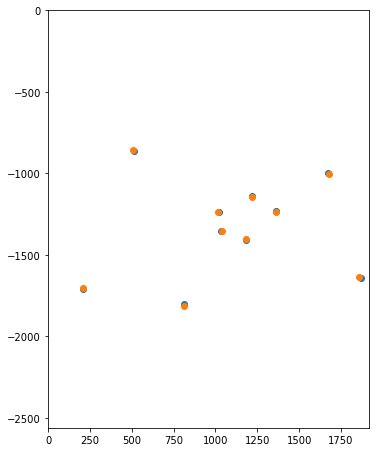

In [33]:
s=3
pl.figure(figsize=(s*1.918,s*2.560))
proj_fid = colin(params_orig(params), lidar_fiducials)
pl.scatter(proj_fid[:, 0]+1918/2, -(proj_fid[:,1]+2560/2))
pl.scatter(fiducials[:,0]+1918/2, -(fiducials[:,1]+2560/2))
pl.xlim(0,1918)
pl.ylim(-2560,0)

### Testing function project

In [34]:
from project_lidar import in_picture
from project_lidar import distance
from PIL import Image

In [35]:
(980648 - 978979) + (199131.861 - 198575.07369)*2048 

1141969.4108800292

In [40]:
#980648.447, 199131.861,1380.707975 WTC
len(np.where(dat[:, 2]>1000)[0])

2

In [64]:
#def project(filename, params):  

# Finds the desired projection

omega, phi, kappa, xs, ys, zs, f = params_orig(params)
image_dims = [1918, 2560]
# image_dims_reversed = np.array([image_dims[1], \
#     image_dims[0]])

# Rearrange
#print "working on: ", filename
dat = lidar_fiducials
#dat = np.load('data_npy_test/x-978979.241501_y-200623.073690.npy').copy()
print "dat:\n", dat[:10]


# Multiply by -1 because it apears as inverse; use orient?
pixel_xy = 1.0*colin(params_orig(params), dat)
print "pixel_xy:\n", pixel_xy[:10]

# un-center pixel (x,y)
x = image_dims[0]/2 + pixel_xy[:,0].astype(int)
y = image_dims[1]/2 + pixel_xy[:,1].astype(int)
print "x and y:\n", x[:10], y[:10]

is_in_picture = in_picture(x,y,image_dims)
print "is_in_picture:\n", is_in_picture[:10]

index = np.arange(is_in_picture.size)[is_in_picture>0]
print "index:\n", index[:10]
print "npix = ", index.size

# distgrid = np.ones(image_dims_reversed)*(100000.0)
# xgrid =  -1.*np.ones(image_dims_reversed)
# ygrid = -1.*np.ones(image_dims_reversed)

distgrid = np.ones(image_dims)*(100000.0)
xgrid =  -1.*np.ones(image_dims)
ygrid = -1.*np.ones(image_dims)

if index.size==0:
    print "no points, returning..."
    #return [distgrid, xgrid, ygrid]

n   = distance(xs,ys,zs, dat[index,0],dat[index,1],dat[index,2]) 
x   = x[index]
y   = y[index]
dat = dat[index]

print "n:\n", n
print "x:\n", x
print "y:\n", y
print "dat:\n", dat

# Add each point to the arrays, given it is visibile (vis[i] == 1)
# And it is closer to the camera than the current value stored in 
# the corresponding pixel of the distance array

nx = distgrid.shape[1]-1
ny = distgrid.shape[0]-1

for ii in range(index.size):
    if n[ii]<distgrid[ny-y[ii],nx-x[ii]] and n[ii]>50:
        distgrid[ny-y[ii],nx-x[ii]] = n[ii]
        xgrid[ny-y[ii],nx-x[ii]] = dat[ii,0]
        ygrid[ny-y[ii],nx-x[ii]] = dat[ii,1]

# print "Done with: ",filename
# return [distgrid, xgrid, ygrid]


dat:
[[  9.88328741e+05   2.11962778e+05   1.02062384e+03]
 [  9.80648447e+05   1.99131861e+05   1.38070798e+03]
 [  9.87656616e+05   2.11766233e+05   4.93890000e+02]
 [  9.83564980e+05   1.99358775e+05   5.91406796e+02]
 [  9.87342468e+05   2.12511054e+05   3.80690000e+02]
 [  9.88596086e+05   2.11789785e+05   2.55310000e+02]
 [  9.88287232e+05   2.13228734e+05   4.88716947e+02]
 [  9.84574798e+05   2.04219630e+05   3.03263412e+02]
 [  9.87140310e+05   2.09161591e+05   3.24317488e+02]
 [  9.86252724e+05   2.05516404e+05   3.65468789e+02]]
pixel_xy:
[[-445.5914584  -416.82219034]
 [ 714.59314992 -279.41435296]
 [ 222.223342    128.27739331]
 [ 257.91370181 -139.56533359]
 [ 909.31659387  361.00325947]
 [-752.35976065  428.3255714 ]
 [-149.07735807  521.04048917]
 [ 403.15677001  -49.31639646]
 [  75.66323992   70.20045468]
 [  60.70025305  -41.79430601]]
x and y:
[ 514 1673 1181 1216 1868  207  810 1362 1034 1019] [ 864 1001 1408 1141 1641 1708 1801 1231 1350 1239]
is_in_picture:
[ Tru

In [52]:
print np.where(distgrid < 100000)

(array([ 758,  851,  918, 1151, 1209, 1320, 1328, 1418, 1558, 1695], dtype=int64), array([1107, 1710,   49,  736,  883,  898,  555,  701,  244, 1403], dtype=int64))


In [53]:
len(np.where(distgrid < 100000)[0])

10

In [65]:
nx = distgrid.shape[1]-1
ny = distgrid.shape[0]-1
print "nx: ", nx
print "ny: ", ny

nx:  1917
ny:  2559


In [56]:
ii=0
n[ii]<distgrid[ny-y[ii],nx-x[ii]]# and n[ii]>50

False

In [58]:
n[ii]

2547.366013667679

In [62]:
y[ii]

864

In [63]:
x[ii]

514

In [61]:
distgrid[ny-y[ii],nx-x[ii]]

2547.366013667679

In [57]:
distgrid.shape

(2560L, 1918L)

In [141]:
imarray.shape

(2560L, 1918L, 3L)

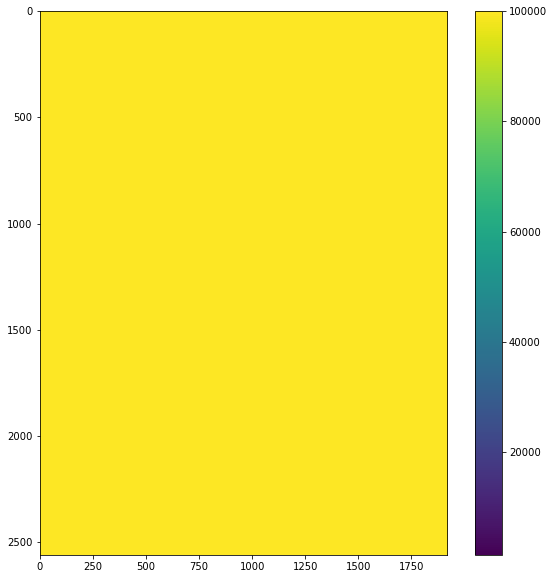

In [39]:
pl.figure(figsize=(10,10))

im = Image.open('./bof_left.png')
imarray = np.array(im)
# pl.imshow(imarray[1250:1300, 950:970, :])
# pl.imshow(distgrid[1250:1300, 950:970], alpha=0.5)
pl.imshow(imarray)
pl.imshow(distgrid, alpha=1)
pl.colorbar()
